# Ejercicio 2

a) Modelo

$$y_{ij} =  \mu + \tau_i + \epsilon_{ij}$$

donde tenemos i tratamientos (1..5) y j observaciones y:

- $\mu$ es la media global 
- $\tau_i$ es el efecto del tratamiento i
- $\epsilon_{ij}$ es el error aleatorio de distribución Normal



b) Las suposiciones son: 

- varianzas iguales
- mediciones y tratamientos independientes


c)

In [1]:
datos = read.csv("/home/emiliano/EstadisticaAplicada/practica/gallinas.csv", sep=",", head=TRUE)
attach(datos)

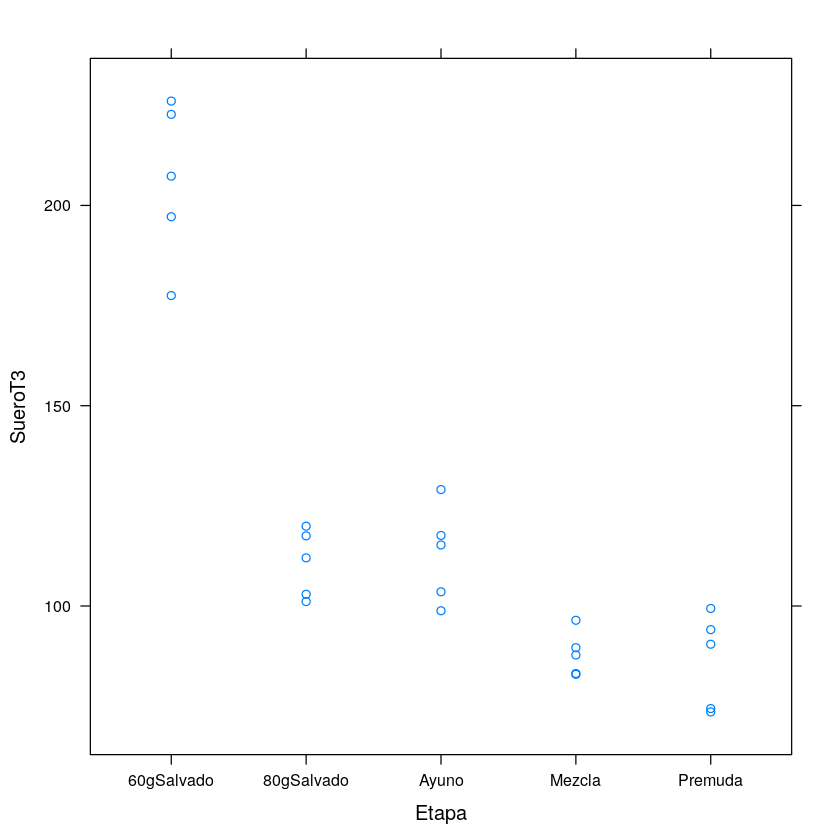

In [2]:
#boxplot(SueroT3~Etapa)
library(lattice)
xyplot(SueroT3~Etapa, data = datos)

In [3]:
# c) Si, afecta porque vemos de la tabla anova que el pvalor es pequeño

# Veamos la tabla ANOVA, que la guardamos en modelo
modelo = aov(SueroT3~Etapa, data = datos)
summary(modelo)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Etapa        4  48569   12142   78.08 6.48e-12 ***
Residuals   20   3110     156                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [4]:
MSE = 156

In [5]:
# lo mismo hecho a pato
pval = 1-pf(78.08, 5-1, 25-5)
pval

[1] 6.481704e-12

d) Analice la validez de los supuestos postulados en (b).

- **NORMALIDAD** Veamos si son normales son el test de shapiro, queremos obtener un pvalor grande para aceptar H0, es decir normalidad en la distribución de los datos

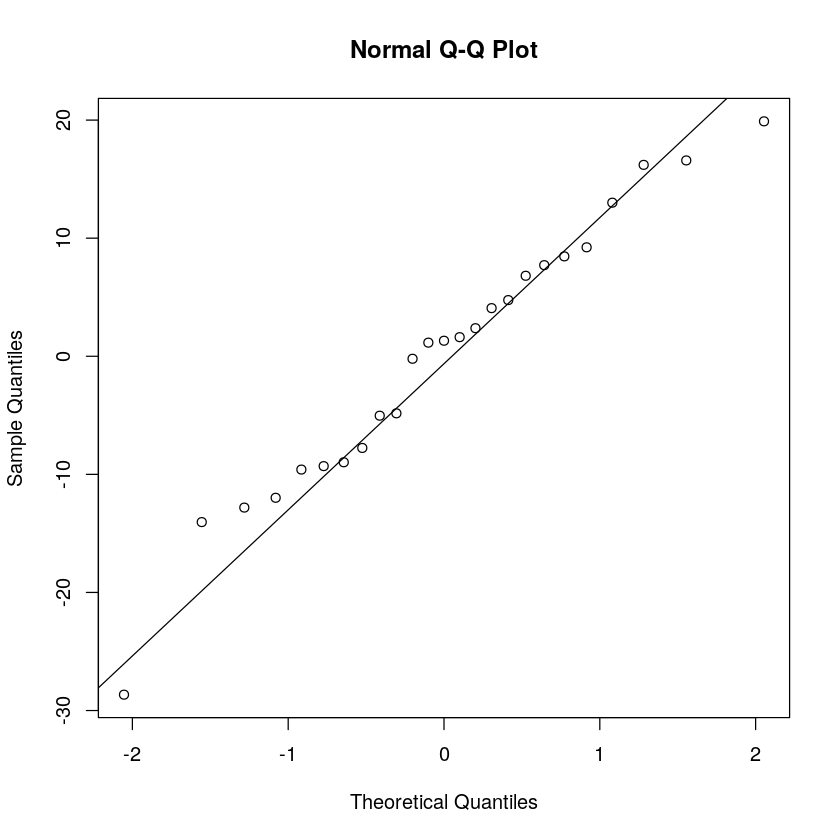

In [6]:
qqnorm(modelo$residuals)
qqline(modelo$residuals)

In [7]:
shapiro.test(modelo$residuals)


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.97412, p-value = 0.7498


- **VARIANZAS CONSTANTES** levene test nos da un pvalor grande, por lo que no rechazamos H0, por ende las varianzas son iguales.

In [8]:
library(car)
leveneTest(modelo)

Loading required package: carData


,Df,F value,Pr(>F)
group,4,1.553884,0.2251455
,20,NA,NA


In [9]:
source("/home/emiliano/EstadisticaAplicada/practica/mymultcomp.R") # llamo al archivo dnd esta la funcion minHSU

In [11]:
maxHSU(SueroT3, Etapa, alpha=0.05, MSE, 20)

[1] "WARNING: esta funcion considera que todos los ni son iguales"
[1] "60gSalvado"


[1] NA           "60gSalvado"

In [12]:
# g) ¿Cuántas gallinas necesitarı́a el biólogo en cada tratamiento para rechazar la hipótesis nula a un
# nivel de significancia de α = 0.05, con una potencia de 0.90, si la diferencia entre el tratamiento
# de control y algún tratamiento nuevo es de 30 unidades de T3?

t = 5
alpha = 0.05
D = 30
sigma2 = 156
potencia_q_quiero = 0.9
r = 5
pot = 0
while (pot < potencia_q_quiero){
    r = r + 1
    # parametro de no centralidad lambda, es el corrimiento de la F
    lambda = (r * D * D) / ( 2*sigma2) 
    A = qf(1-alpha, t-1, r*t-t)
    pot = 1-pf(A, t-1, r*t-t, lambda)
}
r

[1] 7

# Ejercicio 3

1) premuda contra ayuno, 2) ayuno contra 60 g de salvado, 3) 60 contra 80 g de salvado y 4) 80 g de salvado contra mezcla de malta:

In [17]:
library(lsmeans)
medias = lsmeans(modelo, "Etapa")
print(medias)

The 'lsmeans' package is being deprecated.
Users are encouraged to switch to 'emmeans'.
See help('transition') for more information, including how
to convert 'lsmeans' objects and scripts to work with 'emmeans'.


 Etapa       lsmean       SE df  lower.CL  upper.CL
 60gSalvado 206.156 5.576907 20 194.52278 217.78922
 80gSalvado 110.694 5.576907 20  99.06078 122.32722
 Ayuno      112.852 5.576907 20 101.21878 124.48522
 Mezcla      87.972 5.576907 20  76.33878  99.60522
 Premuda     86.374 5.576907 20  74.74078  98.00722

Confidence level used: 0.95 


In [52]:
# premuda - ayuno = u1 - u3
theta1 = 86.374 - 112.852
k1 = c(1,0,-1,0,0)
n = c(5,5,5,5,5)

Sp = sqrt(MSE)
A = qt(1-0.025,25-5)

Li = theta1 - A * Sp * sqrt(sum(k1^2/n))
Ls = theta1 + A * Sp * sqrt(sum(k1^2/n))

In [53]:
# ayuno - 60grSalvado = u3-u5
theta2 = 112.852 - 206.156
k2 = c(0,0,1,0,-1)

Li = theta2 - A * Sp * sqrt(sum(k2^2/n))
Ls = theta2 + A * Sp * sqrt(sum(k2^2/n))

In [54]:
# 60grSalvado-80grSalvado = u5-u4
theta3 = 206.156 - 110.694
k3 = c(0,0,0,-1,1)

Li = theta3 - A * Sp * sqrt(sum(k3^2/n))
Ls = theta3 + A * Sp * sqrt(sum(k3^2/n))
Li
Ls

[1] 78.98421

[1] 111.9398

In [55]:
# 80grSalvado - mezcla = u4-u2
theta4 = 110.694 - 87.972
k4 = c(0,-1,0,1,0)

Li = theta4 - A * Sp * sqrt(sum(k4^2/n))
Ls = theta4 + A * Sp * sqrt(sum(k4^2/n))
Li
Ls

[1] 6.244209

[1] 39.19979

In [56]:
# Veamos la ortogonalidad de los contrastes
sum(k1*k2)
sum(k1*k3)
sum(k1*k4)
sum(k2*k3)
sum(k2*k4)
sum(k3*k4)

[1] -1

[1] 0

[1] 0

[1] -1

[1] 0

[1] -1